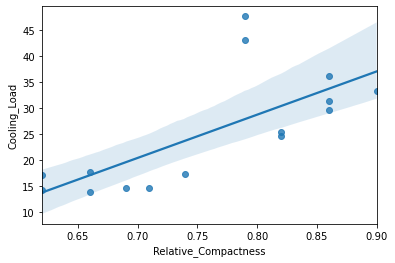

In [133]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel("data/ENB2012_data.xlsx") # reading the excel file into pandas dataframe and then storing it into a variable(df) 
# renaming the columns in df by first creating a dict to them respectively
columns_names =  {"X1":"Relative_Compactness","X2":"Surface_Area","X3":"Wall_Area","X4":"Roof_Area","X5":"Overall_Height","X6":"Orientation","X7":"Glazing_Area","X8":"Glazing_Area_Distribution","Y1":"Heating_Load","Y2":"Cooling_Load"}
df = df.rename(columns=columns_names)
#select a sample of the dataset
# simple_linear_reg_df is a variable selecting feature of 15 random samples from 2 columns in df.
simple_linear_reg_df = df[["Relative_Compactness","Cooling_Load"]].sample(15,random_state=2)
# here we are plotting the feature in a scatter plot
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

In [102]:
df["Heating_Load"]

0      15.55
1      15.55
2      15.55
3      15.55
4      20.84
       ...  
763    17.88
764    16.54
765    16.44
766    16.48
767    16.64
Name: Heating_Load, Length: 768, dtype: float64

In [135]:
from sklearn.preprocessing import MinMaxScaler # importing MinMaxScaler package from sklearn

scalar = MinMaxScaler() # Firstly, we normalise our dataset to a common scale using the min max scaler
normalised_df = pd.DataFrame(scalar.fit_transform(df), columns=df.columns) # creating a seperate dataframe for the normalise data of "df" using min max scaler method in the preprocessing method of scikit-learn module 

features_df = normalised_df.drop(columns=["Heating_Load","Cooling_Load"]) # creating another dataframe without heating_load and cooling
heating_target = normalised_df["Heating_Load"] # another dataframe with only colunm heating load

# Now, we split our dataset into the training and testing dataset. recall above segmented variables features and heating_target will allow us do this!!!
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,heating_target, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression # Now we will now import linear_regression method from scikit learn

linear_model = LinearRegression()
model = linear_model.fit(x_train, y_train) # Now we then fit the model to the training dataset
predicted_values = model.predict(x_test) # we will then test our predictions using the  predict method in the LinearRegression package

####### Getting the performance of our regression model done with either of the commonly use methods #########
# NB. In getting the performance of a model has we obtain how close the predicted_values is, to the Actual_values

# USING MAE (Mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)

# USING RSS (Residual Sum of squares)
rss = np.sum(np.square(y_test - predicted_values))

# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

# R squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)

print("ANSWER USING MAE: {}".format(round(mae,3)))
print("ANSWER USING RSS: {}".format(round(rss,3)))
print("ANSWER USING RMSE: {}".format(round(rmse,3)))
print("ANSWER USING r2_score: {}".format(round(r2_score,3)))


ANSWER USING MAE: 0.063
ANSWER USING RSS: 1.817
ANSWER USING RMSE: 0.089
ANSWER USING r2_score: 0.894


In [123]:
# df
# normalised_df

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [66]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5)

In [67]:
from sklearn.linear_model import Lasso
Lasso_reg = Ridge(alpha=0.0001)
Lasso_reg.fit(x_train, y_train)

Ridge(alpha=0.0001)

In [71]:
model = linear_model.fit(x_train, y_train)

In [118]:
def get_weights_df(model, feat, col_name):
    # this function return weights for every features_df
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

In [119]:
linear_model_weights = get_weights_df(model, x_train, "Linear_Model_Weight")
ridge_weight_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")
lasso_weight_df = get_weights_df(Lasso_reg, x_train, "Lasso_Weight")
final_weights = pd.merge(linear_model_weights, ridge_weight_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weight_df, on="Features")

In [116]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Roof_Area,-9.440058e+12,-0.163192,-0.327996
1,Wall_Area,-7.342267e+12,0.103061,0.018992
2,Relative_Compactness,-6.064125e-01,-0.283471,-0.606228
3,Orientation,9.719849e-03,0.003369,0.003399
4,Glazing_Area_Distribution,3.764343e-02,0.029088,0.028452
5,Glazing_Area,2.042885e-01,0.212449,0.215041
6,Overall_Height,3.935547e-01,0.442467,0.393587
7,Surface_Area,1.258674e+13,-0.062275,-0.234918


In [120]:
final_weights

,Features,Linear_Model_Weight,idge_Weight,Lasso_Weight
0,Roof_Area,-9.440058e+12,-0.163192,-0.327996
1,Wall_Area,-7.342267e+12,0.103061,0.018992
2,Relative_Compactness,-6.064125e-01,-0.283471,-0.606228
3,Orientation,9.719849e-03,0.003369,0.003399
4,Glazing_Area_Distribution,3.764343e-02,0.029088,0.028452
5,Glazing_Area,2.042885e-01,0.212449,0.215041
6,Overall_Height,3.935547e-01,0.442467,0.393587
7,Surface_Area,1.258674e+13,-0.062275,-0.234918


In [129]:
lasso_weight_df

,Features,Lasso_Weight
0,Relative_Compactness,-0.606228
1,Roof_Area,-0.327996
2,Surface_Area,-0.234918
3,Orientation,0.003399
4,Wall_Area,0.018992
5,Glazing_Area_Distribution,0.028452
6,Glazing_Area,0.215041
7,Overall_Height,0.393587


In [130]:
ridge_weight_df

,Features,idge_Weight
0,Relative_Compactness,-0.283471
1,Roof_Area,-0.163192
2,Surface_Area,-0.062275
3,Orientation,0.003369
4,Glazing_Area_Distribution,0.029088
5,Wall_Area,0.103061
6,Glazing_Area,0.212449
7,Overall_Height,0.442467


In [131]:
# Test 
import pandas as pd
import numpy as np
import seaborn as sns

Lin = pd.read_csv("data/energydata_complete.csv") # reading the csv file into pandas dataframe and then storing it into a variable(df) 
# renaming the columns in df by first creating a dict to them respectively
#columns_names =  {"T1":" ","RH_1":" ","T2":" ","RH_2":"T3","RH_3":" ","T4":" ","RH_4":" ","T5":" ","RH_5":" ","T6":" ","RH_6":" ","T7":" ","RH_7":" ","T8":" ","RH_8":" ","T9":" ","RH_9":" ","T_out":" ","Press_mm_hg":" ","RH_out":" ","Windspeed":" ","Visibility":" ","Tdewpoint":" ","rv1":" ","rv2":" "}
#df = df.rename(columns=columns_names)

from sklearn.preprocessing import MinMaxScaler # importing MinMaxScaler package from sklearn

scalar = MinMaxScaler() # Firstly, we normalise our dataset to a common scale using the min max scaler
normalised_df = pd.DataFrame(scalar.fit_transform(df), columns=df.columns) # creating a seperate dataframe for the normalise data of "df" using min max scaler method in the preprocessing method of scikit-learn module 

features_df = normalised_df.drop(columns=[""]) # creating another dataframe without heating_load and cooling
heating_target = normalised_df["Heating_Load"] # another dataframe with only colunm heating load

# Now, we split our dataset into the training and testing dataset. recall above segmented variables features and heating_target will allow us do this!!!
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,heating_target, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression # Now we will now import linear_regression method from scikit learn

linear_model = LinearRegression()
model = linear_model.fit(x_train, y_train) # Now we then fit the model to the training dataset
predicted_values = model.predict(x_test) # we will then test our predictions using the  predict method in the LinearRegression package

####### Getting the performance of our regression model #########
# NB. In getting the performance of a model we obtain how close the predicted_values is to the Actual_values

# USING MAE (Mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)

# USING RSS (Residual Sum of squares)
rss = np.sum(np.square(y_test - predicted_values))

# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))

# R squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)

print("ANSWER USING MAE: {}".format(round(mae,3)))
print("ANSWER USING RSS: {}".format(round(rss,3)))
print("ANSWER USING RMSE: {}".format(round(rmse,3)))
print("ANSWER USING r2_score: {}".format(round(r2_score,3)))

# Here we are simply trying to understand the penalising method used on regression problem and how to select features[columns]
# that will help make our model more effective

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

from sklearn.linear_model import Lasso
Lasso_reg = Ridge(alpha=0.0001)
Lasso_reg.fit(x_train, y_train)


def get_weights_df(model, feat, col_name):
    # this function return weights for every features_df
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(model, x_train, "Linear_Model_Weight")
ridge_weight_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")
lasso_weight_df = get_weights_df(Lasso_reg, x_train, "Lasso_Weight")
final_weights = pd.merge(linear_model_weights, ridge_weight_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weight_df, on="Features")

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [168]:
lin.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [202]:
lin = pd.read_csv("data/energydata_complete.csv")
new = lin[["T1","RH_1","T2","RH_2","T3","RH_3","T4","RH_4","T5","RH_5","T6","RH_6","T7","RH_7","T8","RH_8","T9","RH_9","T_out","Press_mm_hg","RH_out","Windspeed","Visibility","Tdewpoint","rv1","rv2"]]
from sklearn.preprocessing import MinMaxScaler # importing MinMaxScaler package from sklearn
scalar = MinMaxScaler() # Firstly, we normalise our dataset to a common scale using the min max scaler
normalised_df = pd.DataFrame(scalar.fit_transform(new), columns=new.columns) # creating a seperate dataframe for the normalise data of "df" using min max scaler method in the preprocessing method of scikit-learn module 
features_df = normalised_df.drop(columns=["T2","T6"]) # creating another dataframe without heating_load and cooling
target = normalised_df["T6"] # another dataframe with only colunm heating load

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,target, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression # Now we will now import linear_regression method from scikit learn

linear_model = LinearRegression()
model = linear_model.fit(x_train, y_train) # Now we then fit the model to the training dataset
predicted_values = model.predict(x_test) # we will then test o

# R squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print("ANSWER USING r2_score: {}".format(round(r2_score,3)))

# USING MAE (Mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
print("ANSWER USING MAE: {}".format(round(mae,3)))

# USING RSS (Residual Sum of squares)
rss = np.sum(np.square(y_test - predicted_values))
print("ANSWER USING RSS: {}".format(round(rss,3)))

# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print("ANSWER USING RMSE: {}".format(round(rmse,3)))

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

from sklearn.linear_model import Lasso
Lasso_reg = Ridge(alpha=0.0001)
Lasso_reg.fit(x_train, y_train)


def get_weights_df(model, feat, col_name):
    # this function return weights for every features_df
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(model, x_train, "Linear_Model_Weight")
ridge_weight_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")
lasso_weight_df = get_weights_df(Lasso_reg, x_train, "Lasso_Weight")
final_weights = pd.merge(linear_model_weights, ridge_weight_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weight_df, on="Features")

#
#
#print("ANSWER USING r2_score: {}".format())
final_weights

ANSWER USING r2_score: 0.968
ANSWER USING MAE: 0.025
ANSWER USING RSS: 6.003
ANSWER USING RMSE: 0.032


,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,RH_2,-0.252605,-0.254920,-0.252606
1,RH_6,-0.103337,-0.099916,-0.103336
2,Tdewpoint,-0.086542,0.015821,-0.086515
3,T5,-0.073737,-0.068479,-0.073736
4,RH_8,-0.069304,-0.066005,-0.069303
5,T7,-0.065205,-0.062708,-0.065205
6,T1,-0.051671,-0.050266,-0.051671
7,T8,-0.051446,-0.054343,-0.051447
8,RH_3,-0.045659,-0.042853,-0.045658
9,Press_mm_hg,-0.024324,-0.025553,-0.024325


In [172]:
new 
normalised_df = pd.DataFrame(scalar.fit_transform(new), columns=new.columns)


In [201]:
lin = pd.read_csv("data/energydata_complete.csv")
new = lin[["T2","T6"]]
from sklearn.preprocessing import MinMaxScaler # importing MinMaxScaler package from sklearn
scalar = MinMaxScaler() # Firstly, we normalise our dataset to a common scale using the min max scaler
normalised_df = pd.DataFrame(scalar.fit_transform(new), columns=new.columns) # creating a seperate dataframe for the normalise data of "df" using min max scaler method in the preprocessing method of scikit-learn module 
features_df = normalised_df.drop(columns=["T6"])
target = normalised_df["T6"] # another dataframe with only colunm heating load

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df,target, test_size=0.3, random_state=1)

from sklearn.linear_model import LinearRegression # Now we will now import linear_regression method from scikit learn

linear_model = LinearRegression()
model = linear_model.fit(x_train, y_train) # Now we then fit the model to the training dataset
predicted_values = model.predict(x_test) # we will then test o

#from sklearn.linear_model import Ridge
#ridge_reg = Ridge(alpha=0.5)
#ridge_reg.fit(x_train, y_train)

#from sklearn.linear_model import Lasso
#Lasso_reg = Ridge(alpha=0.0001)
#Lasso_reg.fit(x_train, y_train)

# R squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
print("ANSWER USING r2_score: {}".format(round(r2_score,3)))

# USING MAE (Mean absolute error)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
print("ANSWER USING MAE: {}".format(round(mae,3)))

# USING RSS (Residual Sum of squares)
rss = np.sum(np.square(y_test - predicted_values))
print("ANSWER USING RSS: {}".format(round(rss,3)))

# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
print("ANSWER USING RMSE: {}".format(round(rmse,3)))







ANSWER USING r2_score: 0.646
ANSWER USING MAE: 0.082
ANSWER USING RSS: 65.44
ANSWER USING RMSE: 0.105


In [187]:
24-8

16

In [ ]:
"""def get_weights_df(model, feat, col_name):
    # this function return weights for every features_df
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ["Features", col_name]
    weights_df[col_name].round(3)
    return weights_df

linear_model_weights = get_weights_df(model, x_train, "Linear_Model_Weight")
ridge_weight_df = get_weights_df(ridge_reg, x_train, "Ridge_Weight")
lasso_weight_df = get_weights_df(Lasso_reg, x_train, "Lasso_Weight")
final_weights = pd.merge(linear_model_weights, ridge_weight_df, on="Features")
final_weights = pd.merge(final_weights, lasso_weight_df, on="Features")

#
#"""
#print("ANSWER USING r2_score: {}".format())
